# Seno y Coseno

En estos apuntes se observará como implementar el seno y el coseno de dos formas, y como cada implementación tiene un impacto en su tiempo de ejecución para un conjunto de ángulos.

## Dependencias

In [1]:
import numpy as np
import time
from statistics import median, mean
import matplotlib.pyplot as plt

In [2]:
import statistics

def filtro_mediana(sign, w):
    signc = []
    lc = sign+sign+sign
    ii = len(sign)
    for i in range(len(sign)):
        izq = i + ii - w//2
        der = i + ii + w//2
        signc.append(median(lc[izq:der+1]))
    return signc

In [3]:
def factorial(n):
    p = 1
    for i in range(2,n+1):
        p = p * i
    return p

## Seno

### Primera implementación

La aproximación del seno centrado en $0$ con la Serie de Taylor es la siguiente:

$$
\sin (x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1}
$$



#### Código de la primera Implementación

In [4]:
def sintaylor(x, numel):
    s = 0
    for n in range(numel+1):
        s += (((-1)**n)/(factorial((2*n)+1)))*(x**((2*n)+1))
    return s

#### Error relativo de la primera forma

In [5]:
angs = np.linspace(-2*np.pi, 2*np.pi)
sins = np.sin(angs)

In [6]:
taylorsins = np.asarray([sintaylor(ang, 10) for ang in angs])
np.linalg.norm(sins - taylorsins) / np.linalg.norm(sins)

2.5589246837696894e-05

#### Tiempo al vuelo de la primera forma

In [7]:
%timeit -r 10 -n 10 taylorsins = np.asarray([sintaylor(ang, 10) for ang in angs])

604 µs ± 20.4 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Segunda Implementación

Para la segunda implementación se tratará de deducir un patrón a partir de la serie de Taylor:

$$
\sin (x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n+1)!}x^{2n+1} = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \frac{x^9}{9!} - \frac{x^{11}}{11!} + ⋯
$$

Para un límite superior $N=1$:

$$
\sin (x) = \frac{x}{1!} - \frac{x^3}{3!} = x(1 - \frac{x^2}{2 \times 3})
$$

Para un límite superior $N=2$:

$$
\sin (x) = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} = x(1 - \frac{x^2}{2 \times 3}(1 - \frac{x^2}{4 \times 5}))
$$

Para un límite superior $N=3$:

$$
\sin (x) = \frac{x}{1!} - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} = x(1 - \frac{x^2}{2 \times 3}(1 - \frac{x^2}{4 \times 5}(1 - \frac{x^2}{6 \times 7})))
$$

Y, me parece, que ya se nota el patrón que seguirá la implementación. La ventaja de esto es que solo será necesario elevar al cuadrado y se evitará el uso del factorial.

#### Código de la segunda implementación

In [8]:
def redsin(x, numel):
    xsqr = x*x
    rold = 1
    for i in reversed(range(2,2*numel+1,2)):
        r = (1 + (-xsqr/((i)*(i+1)))*rold)
        rold = r
    return x*r

#### Error relativo de la segunda forma

In [9]:
angs = np.linspace(-2*np.pi, 2*np.pi)
sins = np.sin(angs)

In [10]:
redsins = np.asarray([redsin(ang, 10) for ang in angs])
np.linalg.norm(sins - redsins) / np.linalg.norm(sins)

2.5589246834108923e-05

#### Tiempo al vuelo de la segunda forma

In [11]:
%timeit -r 10 -n 10 redsins = np.asarray([redsin(ang, 10) for ang in angs])

143 µs ± 13.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Mediciones de tiempo de ejecución

In [12]:
nums = list(range(5,20))
veces = range(29)
v1 = []
v2 = []
for num in nums:
    v1i = []
    v2i = []
    for _ in veces:
        tic = time.perf_counter()
        taylorsins = np.asarray([sintaylor(ang, num) for ang in angs])
        toc = time.perf_counter()
        v1i.append(toc - tic)
        
        tic = time.perf_counter()
        redsins = np.asarray([redsin(ang, num) for ang in angs])
        toc = time.perf_counter()
        v2i.append(toc - tic)
        
    v1.append(mean(filtro_mediana(v1i, 7)))
    v2.append(mean(filtro_mediana(v2i, 7)))

### Resultados

#### Tiempo de ejecución

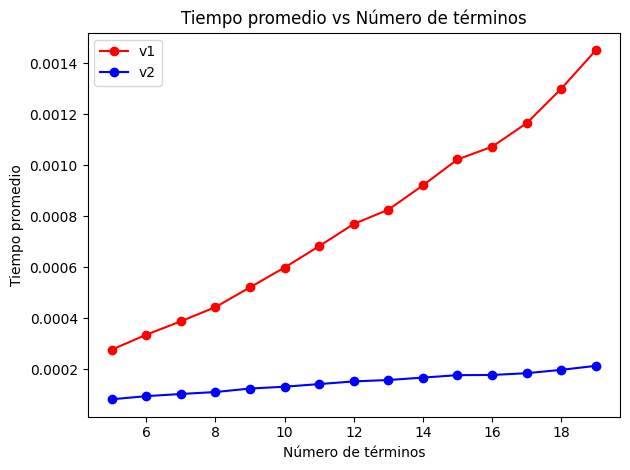

In [13]:
plt.plot(nums,v1,'r-o',label='v1')
plt.plot(nums,v2,'b-o',label='v2')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo promedio')
plt.title('Tiempo promedio vs Número de términos')
plt.legend()
plt.tight_layout()

#### Speedup

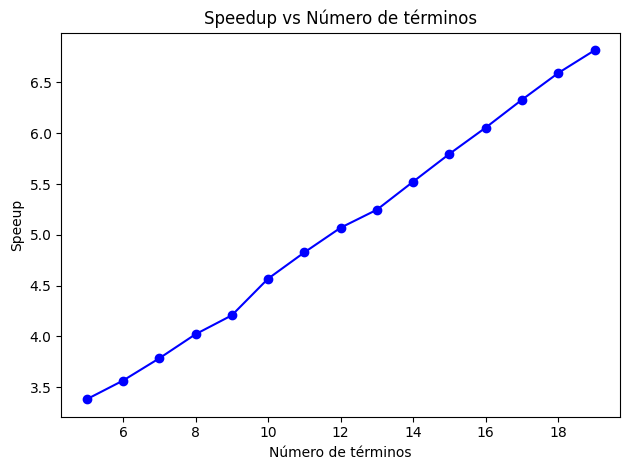

In [14]:
plt.plot(nums,np.asarray(v1)/np.asarray(v2),'b-o')
plt.xlabel('Número de términos')
plt.ylabel('Speeup')
plt.title('Speedup vs Número de términos')
plt.tight_layout()

## Coseno

### Primera implementación

La aproximación del coseno centrado en $0$ con la Serie de Taylor es la siguiente:

$$
\cos (x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n}
$$



#### Código de la primera Implementación

In [15]:
def costaylor(x, numel):
    s = 0
    for n in range(numel+1):
        s += (((-1)**n)/(factorial((2*n))))*(x**((2*n)))
    return s

#### Error relativo de la primera forma

In [16]:
angs = np.linspace(-2*np.pi, 2*np.pi)
coss = np.cos(angs)

In [17]:
taylorcoss = np.asarray([costaylor(ang, 10) for ang in angs])
np.linalg.norm(coss - taylorcoss) / np.linalg.norm(coss)

9.20039348378851e-05

#### Tiempo al vuelo de la primera forma

In [18]:
%timeit -r 10 -n 10 taylorcoss = np.asarray([costaylor(ang, 10) for ang in angs])

591 µs ± 25.3 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Segunda Implementación

Para la segunda implementación se tratará de deducir un patrón a partir de la serie de Taylor:

$$
\cos (x) = \sum_{n=0}^{\infty} \frac{(-1)^n}{(2n)!}x^{2n} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \frac{x^8}{8!} - \frac{x^{10}}{10!} + ⋯
$$

Para un límite superior $N=1$:

$$
\cos (x) = 1 - \frac{x^2}{2!} = 1 - \frac{x^2}{1 \times 2}
$$

Para un límite superior $N=2$:

$$
\cos (x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} = 1 - \frac{x^2}{1 \times 2}(1 - \frac{x^2}{3 \times 4})
$$

Para un límite superior $N=3$:

$$
\cos (x) = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} = 1 - \frac{x^2}{1 \times 2}(1 - \frac{x^2}{3 \times 4}(1 - \frac{x^2}{5 \times 6}))
$$

Esta aproximación brinda las mismas ventajas que en el caso del seno, es decir, solo elevar al cuadrado una vez y evitar el uso del factorial.

#### Código de la segunda implementación

In [19]:
def redcos(x, numel):
    xsqr = x*x
    rold = 1
    for i in reversed(range(1,2*numel+1,2)):
        r = (1 + (-xsqr/((i)*(i+1)))*rold)
        rold = r
    return r

#### Error relativo de la segunda forma

In [20]:
angs = np.linspace(-2*np.pi, 2*np.pi)
coss = np.cos(angs)

In [21]:
redcoss = np.asarray([redcos(ang, 10) for ang in angs])
np.linalg.norm(coss - redcoss) / np.linalg.norm(sins)

9.386278797814671e-05

#### Tiempo al vuelo de la segunda forma

In [22]:
%timeit -r 10 -n 10 redcoss = np.asarray([redcos(ang, 10) for ang in angs])

135 µs ± 10.2 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


### Mediciones de tiempo de ejecución

In [23]:
nums = list(range(5,20))
veces = range(29)
v1 = []
v2 = []
for num in nums:
    v1i = []
    v2i = []
    for _ in veces:
        tic = time.perf_counter()
        taylorcoss = np.asarray([costaylor(ang, 10) for ang in angs])
        toc = time.perf_counter()
        v1i.append(toc - tic)
        
        tic = time.perf_counter()
        redcoss = np.asarray([redcos(ang, 10) for ang in angs])
        toc = time.perf_counter()
        v2i.append(toc - tic)
        
    v1.append(mean(filtro_mediana(v1i, 7)))
    v2.append(mean(filtro_mediana(v2i, 7)))

### Resultados

#### Tiempo de ejecución

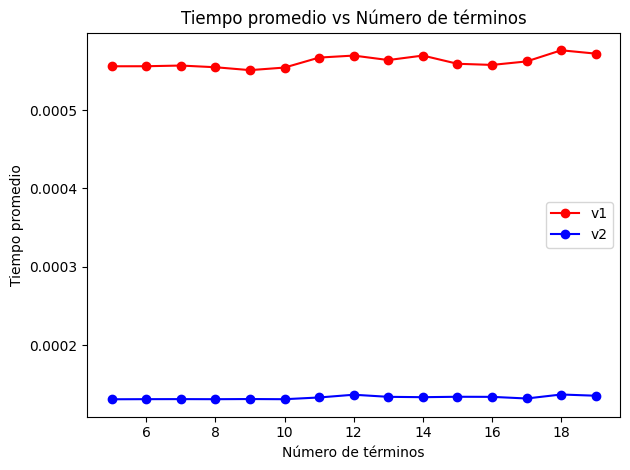

In [24]:
plt.plot(nums,v1,'r-o',label='v1')
plt.plot(nums,v2,'b-o',label='v2')
plt.xlabel('Número de términos')
plt.ylabel('Tiempo promedio')
plt.title('Tiempo promedio vs Número de términos')
plt.legend()
plt.tight_layout()

#### Speedup

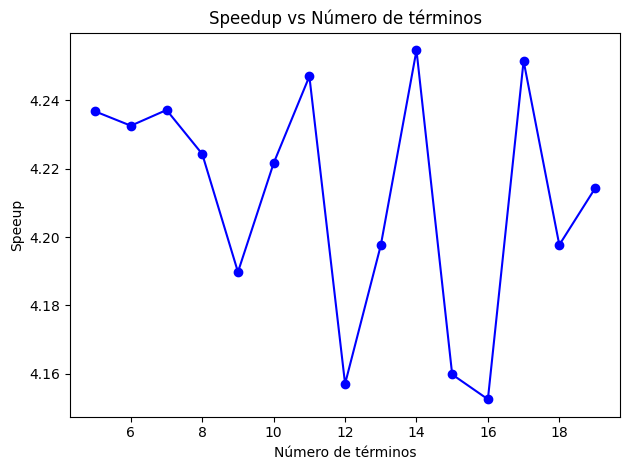

In [25]:
plt.plot(nums,np.asarray(v1)/np.asarray(v2),'b-o')
plt.xlabel('Número de términos')
plt.ylabel('Speeup')
plt.title('Speedup vs Número de términos')
plt.tight_layout()